In [2]:
"""
Uses Python's BeautifulSoup and requests libraries to scrape NBA player salary data from the HoopsHype website for the 2019-2020, 2020-2021, 2021-2022, and 2022-2023 seasons. 
By sending a GET request with custom headers to mimic a browser, it retrieves the HTML content of the salary pages.
The HTML is then parsed to locate the table containing the salary data, and the player names and corresponding salaries are extracted.
The extracted data is stored in lists and converted into a Pandas DataFrame for easy manipulation. 
Each DataFrame is saved as a CSV file with relevant filenames, ensuring the data is well-organized for subsequent analysis. 
This process automates the data collection and storage, demonstrating proficiency in web scraping and data handling using Python.
"""
from bs4 import BeautifulSoup
import requests
import pandas as pd

def nba_sal(url, filename):

    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Referer': 'https://google.com'
    }
    response2018 = requests.get(url, headers = headers)
    soup2018 = BeautifulSoup(response2018.content, 'html.parser')
    table = soup2018.find('table', class_='hh-salaries-ranking-table')
    salaries = []
    players = []
    for row in table.find_all('tr'):
        player_name = row.find('td', class_='name').get_text(strip=True)
        table_elements = row.find_all('td')
        player_salary = None
        if len(table_elements)>3:
            player_salary = table_elements[3].get_text(strip=True)
        if player_name and player_name!='Player' and player_salary and '$' in player_salary:
            salaries.append(player_salary)
            players.append(player_name)

    df = pd.DataFrame({
        'Players': players,
        'Salaries': salaries
    }) 
    df.to_csv(filename,index = False)

url_filename = [
('https://hoopshype.com/salaries/players/2019-2020/','nba_salaries_2019_2020.csv'),
('https://hoopshype.com/salaries/players/2020-2021/','nba_salaries_2020_2021.csv'),
('https://hoopshype.com/salaries/players/2021-2022/','nba_salaries_2021_2022.csv'),
('https://hoopshype.com/salaries/players/2022-2023/','nba_salaries_2022_2023.csv')]
dfs = []
for url,filename in url_filename:
    nba_sal(url,filename)
  
df2019 = pd.read_csv('nba_salaries_2019_2020.csv')
df2020 = pd.read_csv('nba_salaries_2020_2021.csv')
df2021 = pd.read_csv('nba_salaries_2020_2021.csv')
df2022 = pd.read_csv('nba_salaries_2020_2021.csv')



In [6]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO
"""
The calculate_per function computes the Player Efficiency Rating (PER) based on various player statistics such as field goals made (FGM), 
free throws made (FTM), offensive rebounds (OREB), defensive rebounds (DREB), assists (AST), steals (STL), blocks (BLK), turnovers (TO), points (PTS), 
and minutes played (MIN). 
"""
def calculate_per(player_stats):
    FGM, FGA, FTM, FTA, OREB, DREB, AST, STL, BLK, TO, PTS, MIN = player_stats
    uPER = (1 / MIN) * (
        PTS
        + AST
        + STL
        + BLK
        + DREB
        + OREB
        - TO
        
    )
    league_avg_per = 15  
    PER = uPER * (15 / league_avg_per)
    return PER

def nba_stat(url, filename):
    options = webdriver.ChromeOptions()
    options.add_argument('--headless')  # Run in headless mode (without opening a browser window)
    options.add_argument('--no-sandbox')
    options.add_argument('--disable-dev-shm-usage')

    service = ChromeService(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service, options=options)

    driver.get(url)

    df = None  

    try:
        element_present = EC.presence_of_element_located((By.CLASS_NAME, 'Crom_table__p1iZz'))
        WebDriverWait(driver, 10).until(element_present)
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        table = soup.find('table', class_='Crom_table__p1iZz')

        if table:
            print("Table found")
            html_str = str(table)
            df = pd.read_html(StringIO(html_str))[0]
            print(df)
        else:
            print("Table not found")
    finally:
        driver.quit()

    if df is not None:
        df['PER'] = df.apply(lambda row: calculate_per([
            row['FGM'], row['FGA'], row['FTM'], row['FTA'], row['OREB'], 
            row['DREB'], row['AST'], row['STL'], row['BLK'], row['TOV'], 
            row['PTS'], row['MIN']
        ]), axis=1)
        df = df.rename(columns = {'Player':'Players'})

        # Save the updated DataFrame to the CSV file
        df.to_csv(filename + '.csv', index=False)
    else:
        print(f"No data found for URL: {url}")

url_filename = [
    ('https://www.nba.com/stats/leaders?SeasonType=Regular+Season&Season=2019-20', 'player_stats_2019_2020'),
    ('https://www.nba.com/stats/leaders?SeasonType=Regular+Season&Season=2020-21', 'player_stats_2020_2021'),
    ('https://www.nba.com/stats/leaders?SeasonType=Regular+Season&Season=2021-22', 'player_stats_2021_2022'),
    ('https://www.nba.com/stats/leaders?SeasonType=Regular+Season&Season=2022-23', 'player_stats_2022_2023'),
]

for url, filename in url_filename:
    nba_stat(url, filename)


SyntaxError: incomplete input (3450779706.py, line 10)

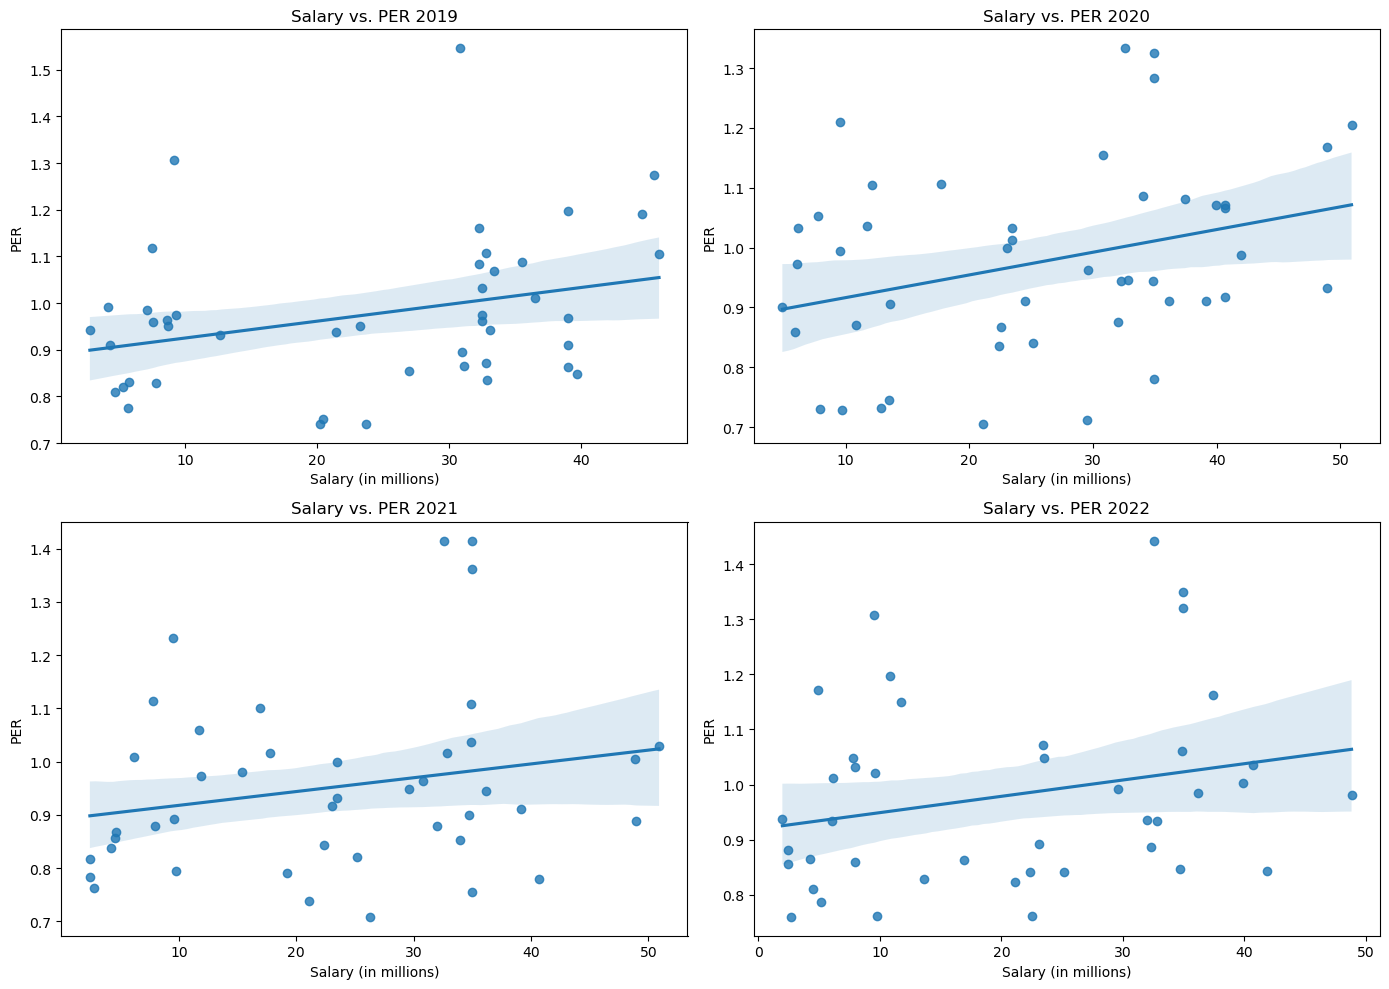

In [5]:
"""
Script reads NBA player salary and performance data from CSV files, merges the data, and performs various manipulations to prepare it for analysis. 
Initially, it reads salary data for the 2019-2020, 2020-2021, and 2021-2022 seasons, and performance data (PER) for the same periods. 
The salary data is merged into a single DataFrame, and then saved to a new CSV file. 
The performance data is similarly merged into a single DataFrame and saved to another CSV file.
Both datasets are then combined based on player names to create a comprehensive DataFrame containing both salary and performance data. 
This combined data is saved to a final CSV file.
Additionally, the salaries are converted from their original format to millions of dollars for better readability. 
Descriptive statistics are generated for salaries and PER, and saved to a CSV file.
Finally, scatter plots with regression lines are created to visualize the relationship between salaries and PER for each year, 
highlighting trends and correlations in the data.
"""
import matplotlib.pyplot as plt
import seaborn as sns
df2019 = pd.read_csv('nba_salaries_2019_2020.csv')
df2020 = pd.read_csv('nba_salaries_2020_2021.csv')
df2021 = pd.read_csv('nba_salaries_2020_2021.csv')
df2022 = pd.read_csv('nba_salaries_2020_2021.csv')
dfs2019 = pd.read_csv('player_stats_2019_2020.csv')
dfs2020 = pd.read_csv('player_stats_2020_2021.csv')
dfs2021 = pd.read_csv('player_stats_2021_2022.csv')
dfs2022 = pd.read_csv('player_stats_2022_2023.csv')
salary = pd.merge(df2019, df2020, on = 'Players', suffixes =('_2019','_2020'))
salary = pd.merge(salary, df2021, on = 'Players', suffixes =('_2020','_2021'))
salary = pd.merge(salary, df2022, on = 'Players', suffixes =('_2021','_2022'))
salary.to_csv('nba_salaries.csv',index=False)
dfs2019 = dfs2019[['Players', 'PER']]
dfs2020 = dfs2020[['Players', 'PER']]
dfs2021 = dfs2021[['Players', 'PER']]
dfs2022 = dfs2022[['Players', 'PER']]
per = pd.merge(dfs2019, dfs2020, on = 'Players', how ='outer', suffixes =('_2019','_2020'))
per = pd.merge(per, dfs2021, on = 'Players', how ='outer', suffixes =('_2020','_2021'))
per = pd.merge(per, dfs2022, on = 'Players', how ='outer',  suffixes =('_2021','_2022'))
per.to_csv('nba_stats.csv',index=False)
all_data = pd.merge(salary, per, on = 'Players')
all_data.to_csv('all_info_nba.csv', index=False)
for year in ['2019', '2020', '2021', '2022']:
    all_data[f'Salaries_{year}'] = all_data[f'Salaries_{year}'].replace({'\$': '', ',': ''}, regex=True).astype(float) / 1000000

descriptive_stats = all_data[['Salaries_2019', 'Salaries_2020', 'Salaries_2021', 'Salaries_2022', 'PER_2019', 'PER_2020', 'PER_2021', 'PER_2022']].describe()
descriptive_stats.to_csv('descriptive_stat_nba.csv',index=False)
plt.figure(figsize=(14, 10))
years = ['2019', '2020', '2021', '2022']
for i, year in enumerate(years):
    plt.subplot(2, 2, i + 1)
    sns.regplot(x=f'Salaries_{year}', y=f'PER_{year}', data=all_data)
    plt.title(f'Salary vs. PER {year}')
    plt.xlabel('Salary (in millions)')
    plt.ylabel('PER')
    plt.ticklabel_format(style='plain', axis='x')  
plt.savefig('salary_vs_per_plot.png')
plt.tight_layout()
plt.show()